# Tutorial: Finite-Fault Stochastic Ground Motion Simulation

This tutorial demonstrates how to use the stochastic seismic simulation library to generate ground motion time series using **finite fault modeling**. The code implements a physics-based approach that simulates earthquake ground motions by synthesizing contributions from multiple subfaults, accounting for rupture dynamics, wave propagation, and site effects.

## Introduction

Stochastic finite fault modeling is a powerful technique for predicting earthquake ground motions, especially in regions with limited recorded data. This implementation follows the methodology of programs like __EXSIM__, providing realistic ground motion simulations for seismic hazard assessment.

## Setup and Installation
First, ensure you have the required dependencies installed:



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seismic_wave_generator


## Running the Simulation

To run the code, you need to:

1. Define earthquake parameters
2. Set simulation parameters
3. Specify fault geometry
4. Provide site locations
5. Execute the simulation for each site
   
Here's how to set up and run the simulation:


In [ ]:
# Get the directory of the current script
current_dir = os.path.dirname(os.path.abspath(__file__))

# For cases with a larger number of sites, better to use a sites.csv file:
# data_file_path = os.path.join(current_dir, 'data', 'sites.csv')
# sites = pd.read_csv(data_file_path)

# Using manually defined site coordinates instead
site_coords = [
    {'lon': -9.5, 'lat': 38.78},
    {'lon': -9.48, 'lat': 38.76},
    {'lon': -9.48, 'lat': 38.78},
    {'lon': -9.48, 'lat': 38.8}
]
sites = pd.DataFrame(site_coords)

# Output directory for accelerograms
output_folder = os.path.join(current_dir, 'data', 'ACC')
os.makedirs(output_folder, exist_ok=True)

# Define ground motion model parameters for Southwest Iberia inland region
my_model = seismic_wave_generator.StochasticModelParameters(
    # Geometric spreading parameters
    geometric_spreading=seismic_wave_generator.GeometricSpreadingParameters(
        r_ref=1.0,
        segments=[(70.0, -1.1), (100.0, 0.2), (float('inf'), -1.55)]
    ),
    
    # Quality factor parameters
    quality_factor=seismic_wave_generator.QualityFactorParameters(
        Q0=120.0,
        eta=0.93,
        Qmin=600.0
    ),
    
    # Path duration parameters
    path_duration=seismic_wave_generator.PathDurationParameters(
        duration_points=[
            (0.0, 0.0),    
            (10.0, 0.13),
            (70.0, 0.09),
            (120.0, 0.05),
        ],
        slope_beyond_last=0.05
    ),
    
    # Site attenuation parameter
    site_attenuation=seismic_wave_generator.SiteAttenuationParameters(
        kappa=0.033
    ),
    
    # Other parameters
    stress_drop=200.0,  # in bars
    roll=2.8,  # density (g/cm³)
    beta=3.5,  # shear-wave velocity (km/s)
    vs30=760.0  # in m/s
)

# Earthquake and fault parameters
earthquake_params = seismic_wave_generator.EarthquakeParameters(
    M=6.0,
    rake=90,
    strike=30.0,
    dip=15.0,
    h_ref=5.0,
    stress_ref=70,
    sigma=200  # in bars
)

# Simulation parameters with ground motion model
simulation_params = seismic_wave_generator.SimulationParameters(
    NS=10,  # Number of simulations
    dt=0.005,  # Time step
    roll=2.8,  # Density
    beta=3.5,  # Shear-wave velocity
    Vs30=0.76,  # Site Vs30 in km/s
    Tr=np.concatenate([  # Periods for response spectra
        np.arange(0.02, 0.26, 0.05),
        np.arange(0.3, 1., 0.05),
        np.arange(1.1, 2.1, 0.15),
        np.arange(2.2, 3.1, 0.5),
        np.arange(3, 5.6, 1)
    ]),
    kappa=0.033,  # Site kappa
    tpad=20,  # Time padding
    pulsing_percent=50.0,  # Percentage of pulsing subfaults
    rupture_velocity=2.8,  # Rupture velocity
    gm_model=my_model,  # Ground motion model
    pulse_params=seismic_wave_generator.PulseParameters(  # Pulse model parameters
        enabled=False,  # Disable by default
        gamma=2.0,
        nu=0.0,
        t0=None,
        peak_factor=1.5
    )
)

# Fault parameters
fault_params = seismic_wave_generator.FaultParameters(
    subfault_size=2.0,
    rupture_lat=38.8,
    rupture_lon=-9.40,
)


# Processing Sites and Running the Simulation


Processing Site 1/49 (Lat: 38.78, Lon: -9.5)
Site 1: Rhypo = 9.41 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 285.1852 cm/s²
Subfault PGA (i=0, j=1): 190.2282 cm/s²
Subfault PGA (i=1, j=0): 155.7011 cm/s²
Subfault PGA (i=1, j=1): 27.9393 cm/s²
Subfault PGA (i=2, j=0): 27.0657 cm/s²
Subfault PGA (i=2, j=1): 9.7700 cm/s²
Subfault PGA (i=3, j=0): 154.9055 cm/s²
Subfault PGA (i=3, j=1): 68.9790 cm/s²
Total PGA: 363.8247 cmm/s²
Total PGA: 363.8247 cm/s²


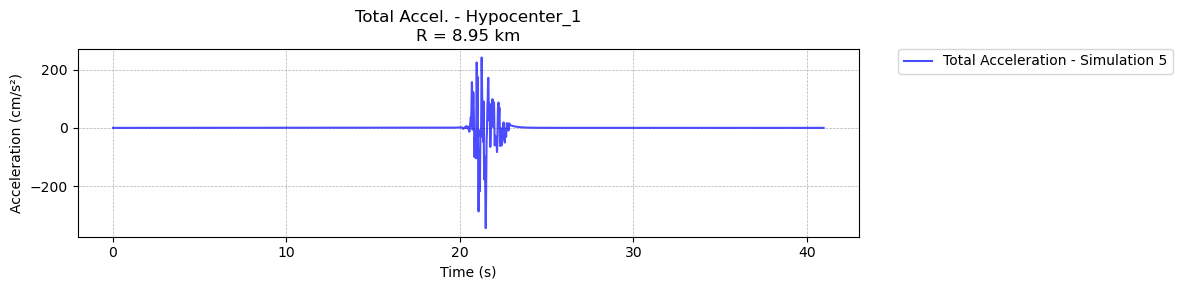

Processing Site 2/49 (Lat: 38.76, Lon: -9.48)
Site 2: Rhypo = 9.11 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 291.2604 cm/s²
Subfault PGA (i=0, j=1): 230.8657 cm/s²
Subfault PGA (i=1, j=0): 154.1040 cm/s²
Subfault PGA (i=1, j=1): 40.7663 cm/s²
Subfault PGA (i=2, j=0): 32.6710 cm/s²
Subfault PGA (i=2, j=1): 13.2606 cm/s²
Subfault PGA (i=3, j=0): 144.5531 cm/s²
Subfault PGA (i=3, j=1): 76.9377 cm/s²
Total PGA: 516.0251 cmm/s²
Total PGA: 516.0251 cm/s²


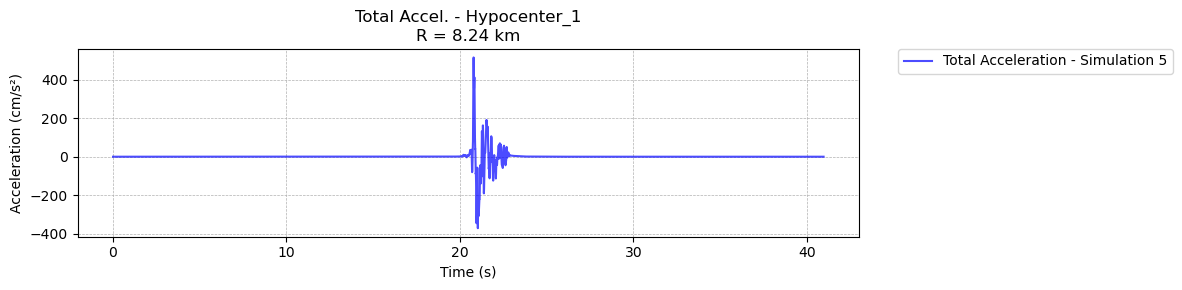

Processing Site 3/49 (Lat: 38.78, Lon: -9.48)
Site 3: Rhypo = 8.08 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 370.0444 cm/s²
Subfault PGA (i=0, j=1): 251.1800 cm/s²
Subfault PGA (i=1, j=0): 233.9906 cm/s²
Subfault PGA (i=1, j=1): 49.4917 cm/s²
Subfault PGA (i=2, j=0): 30.2289 cm/s²
Subfault PGA (i=2, j=1): 11.3142 cm/s²
Subfault PGA (i=3, j=0): 216.4819 cm/s²
Subfault PGA (i=3, j=1): 112.1350 cm/s²
Total PGA: 505.5287 cmm/s²
Total PGA: 505.5287 cm/s²


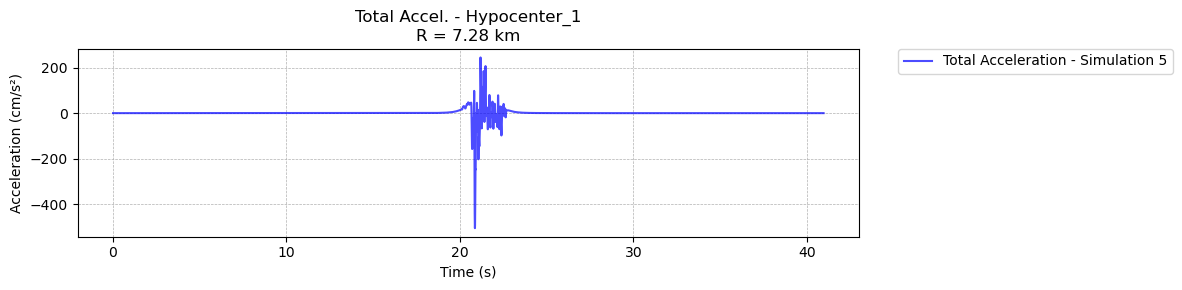

Processing Site 4/49 (Lat: 38.8, Lon: -9.48)
Site 4: Rhypo = 7.58 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 353.5061 cm/s²
Subfault PGA (i=0, j=1): 253.0460 cm/s²
Subfault PGA (i=1, j=0): 176.6788 cm/s²
Subfault PGA (i=1, j=1): 46.1368 cm/s²
Subfault PGA (i=2, j=0): 40.7267 cm/s²
Subfault PGA (i=2, j=1): 12.4572 cm/s²
Subfault PGA (i=3, j=0): 212.6608 cm/s²
Subfault PGA (i=3, j=1): 120.2547 cm/s²
Total PGA: 609.5950 cmm/s²
Total PGA: 609.5950 cm/s²


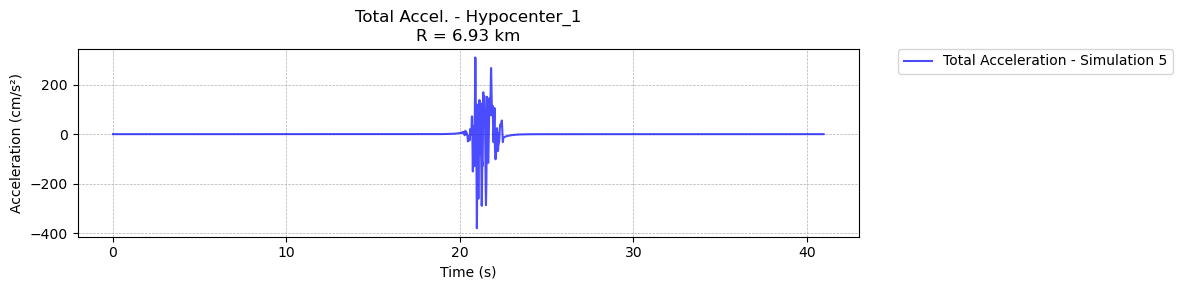

Processing Site 5/49 (Lat: 38.7, Lon: -9.46)
Site 5: Rhypo = 13.36 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 208.0283 cm/s²
Subfault PGA (i=0, j=1): 155.2530 cm/s²
Subfault PGA (i=1, j=0): 91.7678 cm/s²
Subfault PGA (i=1, j=1): 26.6457 cm/s²
Subfault PGA (i=2, j=0): 18.6949 cm/s²
Subfault PGA (i=2, j=1): 6.2713 cm/s²
Subfault PGA (i=3, j=0): 123.3184 cm/s²
Subfault PGA (i=3, j=1): 73.9171 cm/s²
Total PGA: 226.7883 cmm/s²
Total PGA: 226.7883 cm/s²


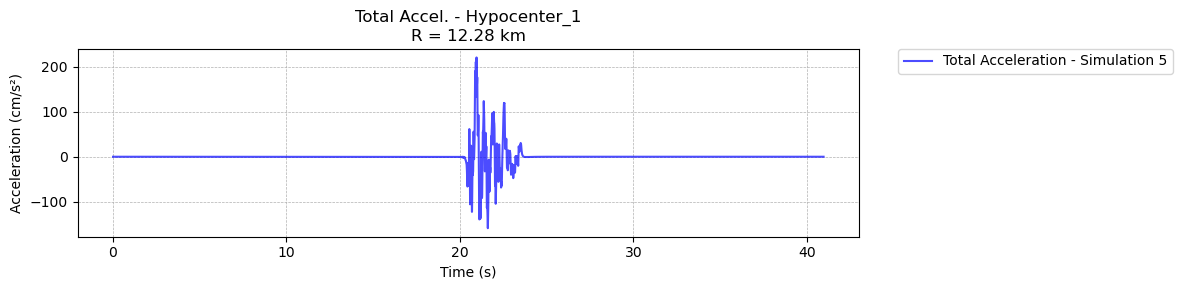

Processing Site 6/49 (Lat: 38.72, Lon: -9.46)
Site 6: Rhypo = 11.45 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 281.8765 cm/s²
Subfault PGA (i=0, j=1): 162.2403 cm/s²
Subfault PGA (i=1, j=0): 119.0551 cm/s²
Subfault PGA (i=1, j=1): 33.0525 cm/s²
Subfault PGA (i=2, j=0): 26.5557 cm/s²
Subfault PGA (i=2, j=1): 11.4897 cm/s²
Subfault PGA (i=3, j=0): 91.5851 cm/s²
Subfault PGA (i=3, j=1): 111.5621 cm/s²
Total PGA: 383.6526 cmm/s²
Total PGA: 383.6526 cm/s²


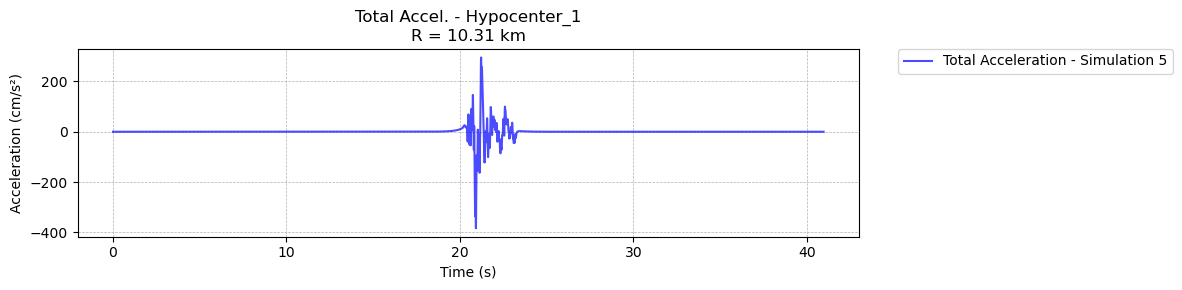

Processing Site 7/49 (Lat: 38.74, Lon: -9.46)
Site 7: Rhypo = 9.67 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 291.8757 cm/s²
Subfault PGA (i=0, j=1): 235.7439 cm/s²
Subfault PGA (i=1, j=0): 133.2098 cm/s²
Subfault PGA (i=1, j=1): 38.4135 cm/s²
Subfault PGA (i=2, j=0): 28.6957 cm/s²
Subfault PGA (i=2, j=1): 13.0075 cm/s²
Subfault PGA (i=3, j=0): 119.6312 cm/s²
Subfault PGA (i=3, j=1): 59.9940 cm/s²
Total PGA: 400.9334 cmm/s²
Total PGA: 400.9334 cm/s²


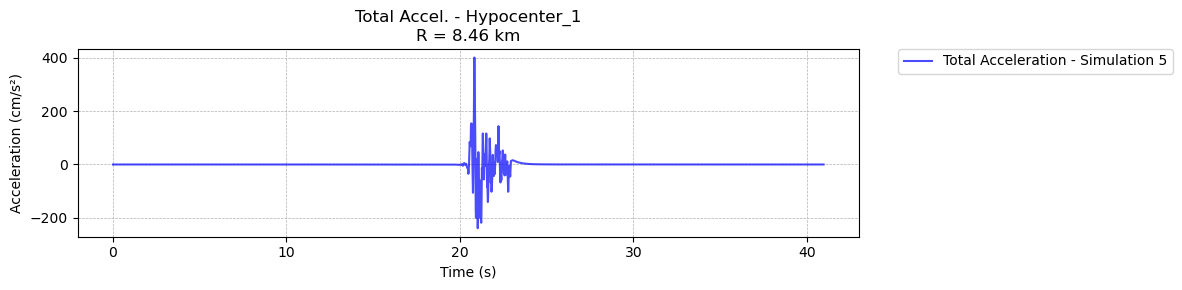

Processing Site 8/49 (Lat: 38.76, Lon: -9.46)
Site 8: Rhypo = 8.12 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 359.5180 cm/s²
Subfault PGA (i=0, j=1): 241.4666 cm/s²
Subfault PGA (i=1, j=0): 224.4648 cm/s²
Subfault PGA (i=1, j=1): 54.1483 cm/s²
Subfault PGA (i=2, j=0): 38.1458 cm/s²
Subfault PGA (i=2, j=1): 14.1867 cm/s²
Subfault PGA (i=3, j=0): 179.7080 cm/s²
Subfault PGA (i=3, j=1): 116.0093 cm/s²
Total PGA: 458.3575 cmm/s²
Total PGA: 458.3575 cm/s²


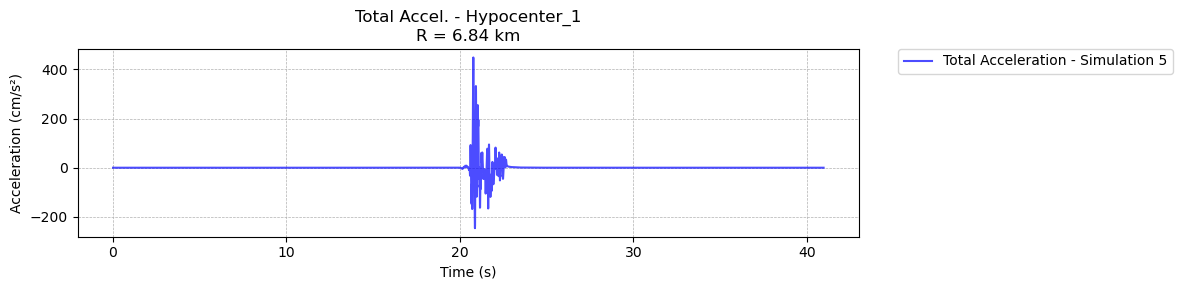

Processing Site 9/49 (Lat: 38.78, Lon: -9.46)
Site 9: Rhypo = 6.94 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 456.3624 cm/s²
Subfault PGA (i=0, j=1): 258.7194 cm/s²
Subfault PGA (i=1, j=0): 245.4822 cm/s²
Subfault PGA (i=1, j=1): 41.9848 cm/s²
Subfault PGA (i=2, j=0): 57.1835 cm/s²
Subfault PGA (i=2, j=1): 16.9605 cm/s²
Subfault PGA (i=3, j=0): 196.5077 cm/s²
Subfault PGA (i=3, j=1): 169.2139 cm/s²
Total PGA: 664.7407 cmm/s²
Total PGA: 664.7407 cm/s²


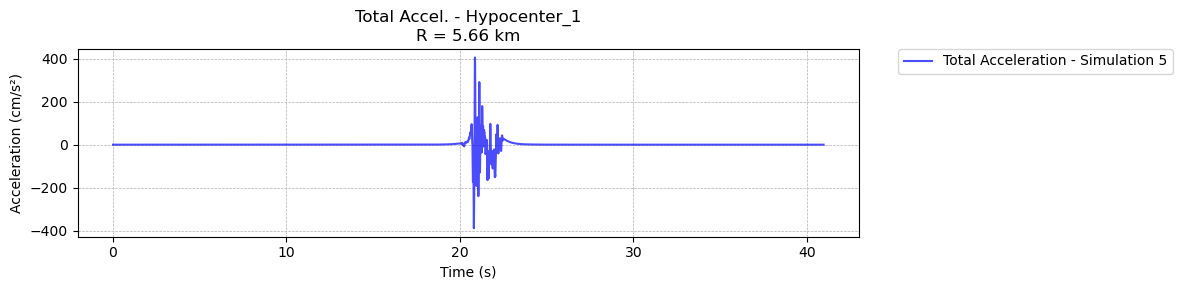

Processing Site 10/49 (Lat: 38.8, Lon: -9.46)
Site 10: Rhypo = 6.35 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 506.7930 cm/s²
Subfault PGA (i=0, j=1): 230.1407 cm/s²
Subfault PGA (i=1, j=0): 297.0566 cm/s²
Subfault PGA (i=1, j=1): 57.6072 cm/s²
Subfault PGA (i=2, j=0): 67.8037 cm/s²
Subfault PGA (i=2, j=1): 13.8970 cm/s²
Subfault PGA (i=3, j=0): 278.1405 cm/s²
Subfault PGA (i=3, j=1): 151.5960 cm/s²
Total PGA: 651.0485 cmm/s²
Total PGA: 651.0485 cm/s²


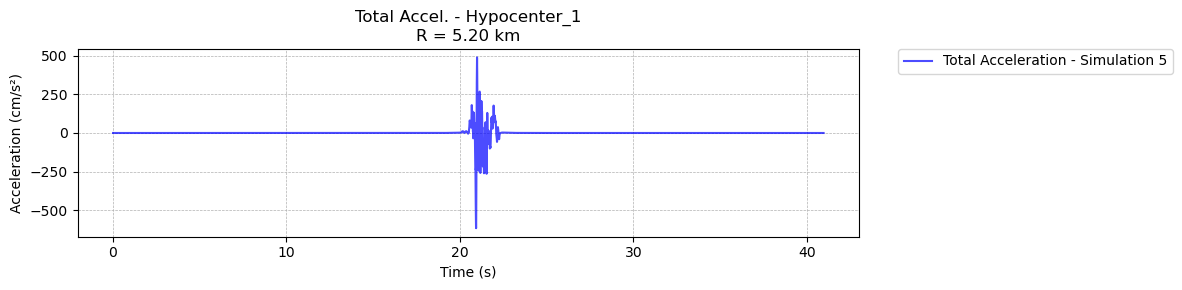

Processing Site 11/49 (Lat: 38.82, Lon: -9.46)
Site 11: Rhypo = 6.51 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 469.9727 cm/s²
Subfault PGA (i=0, j=1): 245.8165 cm/s²
Subfault PGA (i=1, j=0): 320.9897 cm/s²
Subfault PGA (i=1, j=1): 56.7424 cm/s²
Subfault PGA (i=2, j=0): 84.9481 cm/s²
Subfault PGA (i=2, j=1): 14.9697 cm/s²
Subfault PGA (i=3, j=0): 310.9159 cm/s²
Subfault PGA (i=3, j=1): 166.6901 cm/s²
Total PGA: 722.8614 cmm/s²
Total PGA: 722.8614 cm/s²


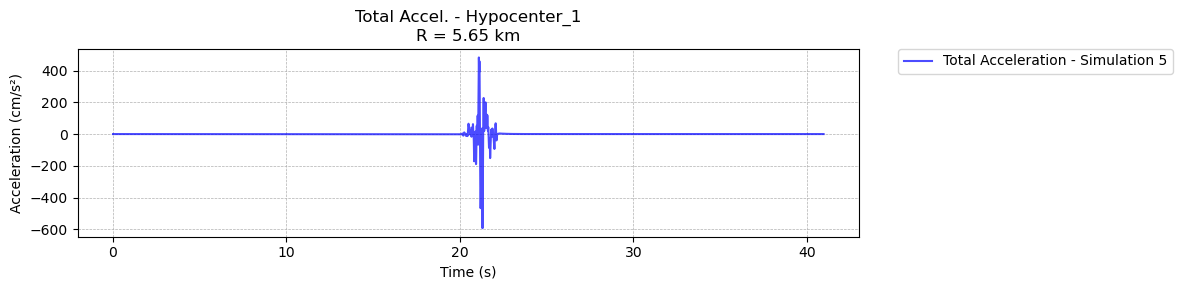

Processing Site 12/49 (Lat: 38.84, Lon: -9.46)
Site 12: Rhypo = 7.38 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 370.9530 cm/s²
Subfault PGA (i=0, j=1): 249.7691 cm/s²
Subfault PGA (i=1, j=0): 313.5889 cm/s²
Subfault PGA (i=1, j=1): 62.3203 cm/s²
Subfault PGA (i=2, j=0): 59.6565 cm/s²
Subfault PGA (i=2, j=1): 14.3936 cm/s²
Subfault PGA (i=3, j=0): 327.4929 cm/s²
Subfault PGA (i=3, j=1): 115.0291 cm/s²
Total PGA: 591.0535 cmm/s²
Total PGA: 591.0535 cm/s²


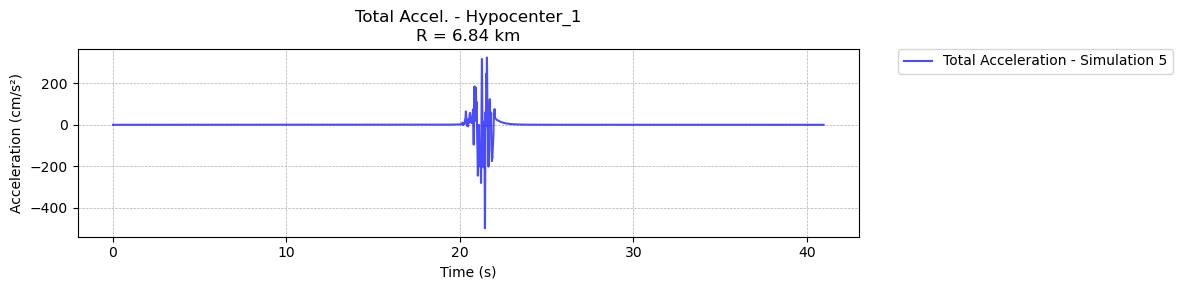

Processing Site 13/49 (Lat: 38.7, Lon: -9.44)
Site 13: Rhypo = 12.93 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 179.0300 cm/s²
Subfault PGA (i=0, j=1): 151.2940 cm/s²
Subfault PGA (i=1, j=0): 106.5869 cm/s²
Subfault PGA (i=1, j=1): 25.0085 cm/s²
Subfault PGA (i=2, j=0): 26.3022 cm/s²
Subfault PGA (i=2, j=1): 8.5753 cm/s²
Subfault PGA (i=3, j=0): 104.8311 cm/s²
Subfault PGA (i=3, j=1): 83.2006 cm/s²
Total PGA: 216.4908 cmm/s²
Total PGA: 216.4908 cm/s²


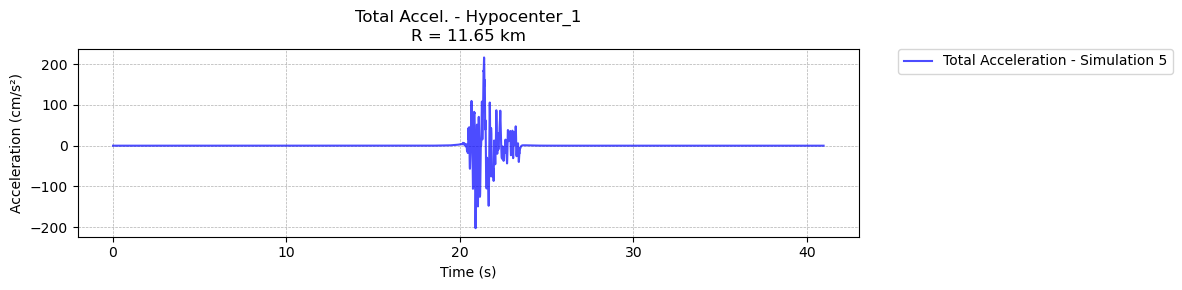

Processing Site 14/49 (Lat: 38.72, Lon: -9.44)
Site 14: Rhypo = 10.95 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 256.2109 cm/s²
Subfault PGA (i=0, j=1): 175.1661 cm/s²
Subfault PGA (i=1, j=0): 166.9836 cm/s²
Subfault PGA (i=1, j=1): 28.8702 cm/s²
Subfault PGA (i=2, j=0): 30.6367 cm/s²
Subfault PGA (i=2, j=1): 9.8657 cm/s²
Subfault PGA (i=3, j=0): 122.2820 cm/s²
Subfault PGA (i=3, j=1): 73.6534 cm/s²
Total PGA: 370.4655 cmm/s²
Total PGA: 370.4655 cm/s²


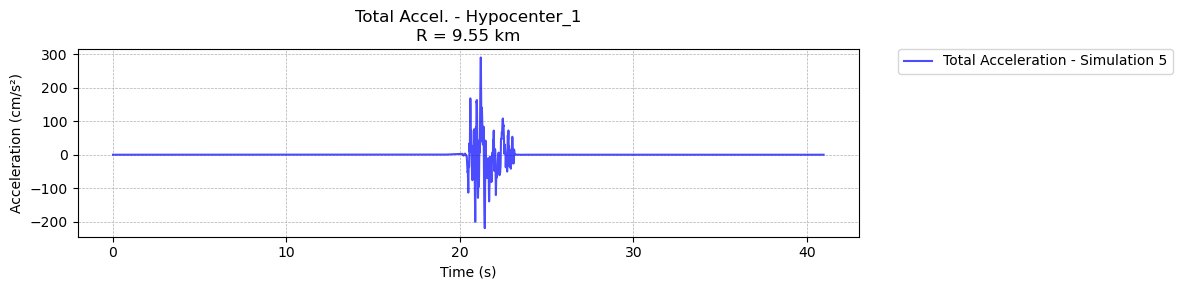

Processing Site 15/49 (Lat: 38.74, Lon: -9.44)
Site 15: Rhypo = 9.08 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 356.4714 cm/s²
Subfault PGA (i=0, j=1): 249.9656 cm/s²
Subfault PGA (i=1, j=0): 188.9506 cm/s²
Subfault PGA (i=1, j=1): 44.0253 cm/s²
Subfault PGA (i=2, j=0): 32.2072 cm/s²
Subfault PGA (i=2, j=1): 11.0713 cm/s²
Subfault PGA (i=3, j=0): 150.2594 cm/s²
Subfault PGA (i=3, j=1): 111.5587 cm/s²
Total PGA: 433.2790 cmm/s²
Total PGA: 433.2790 cm/s²


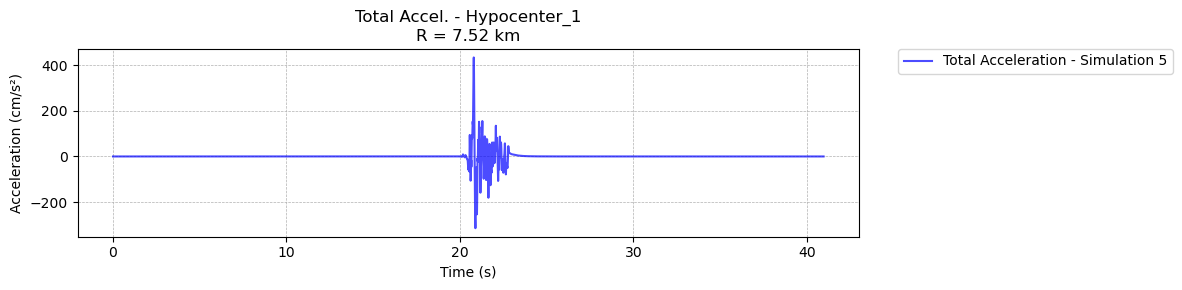

Processing Site 16/49 (Lat: 38.76, Lon: -9.44)
Site 16: Rhypo = 7.40 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 468.6592 cm/s²
Subfault PGA (i=0, j=1): 253.4758 cm/s²
Subfault PGA (i=1, j=0): 261.9329 cm/s²
Subfault PGA (i=1, j=1): 68.0490 cm/s²
Subfault PGA (i=2, j=0): 47.4149 cm/s²
Subfault PGA (i=2, j=1): 13.9823 cm/s²
Subfault PGA (i=3, j=0): 168.5019 cm/s²
Subfault PGA (i=3, j=1): 151.7617 cm/s²
Total PGA: 571.8305 cmm/s²
Total PGA: 571.8305 cm/s²


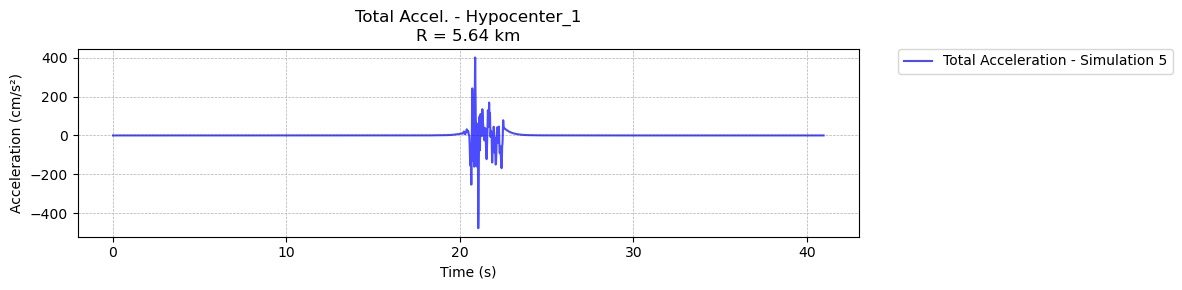

Processing Site 17/49 (Lat: 38.78, Lon: -9.44)
Site 17: Rhypo = 6.09 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 608.5153 cm/s²
Subfault PGA (i=0, j=1): 417.2172 cm/s²
Subfault PGA (i=1, j=0): 341.6542 cm/s²
Subfault PGA (i=1, j=1): 83.6389 cm/s²
Subfault PGA (i=2, j=0): 73.3669 cm/s²
Subfault PGA (i=2, j=1): 16.2900 cm/s²
Subfault PGA (i=3, j=0): 257.0085 cm/s²
Subfault PGA (i=3, j=1): 117.3930 cm/s²
Total PGA: 745.0497 cmm/s²
Total PGA: 745.0497 cm/s²


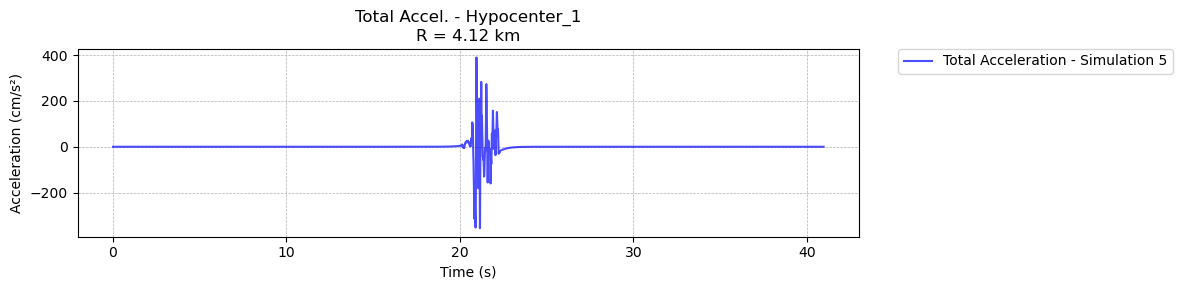

Processing Site 18/49 (Lat: 38.8, Lon: -9.44)
Site 18: Rhypo = 5.41 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 657.0364 cm/s²
Subfault PGA (i=0, j=1): 421.4133 cm/s²
Subfault PGA (i=1, j=0): 383.5017 cm/s²
Subfault PGA (i=1, j=1): 84.5835 cm/s²
Subfault PGA (i=2, j=0): 84.0776 cm/s²
Subfault PGA (i=2, j=1): 20.1807 cm/s²
Subfault PGA (i=3, j=0): 242.7737 cm/s²
Subfault PGA (i=3, j=1): 171.2840 cm/s²
Total PGA: 793.8164 cmm/s²
Total PGA: 793.8164 cm/s²


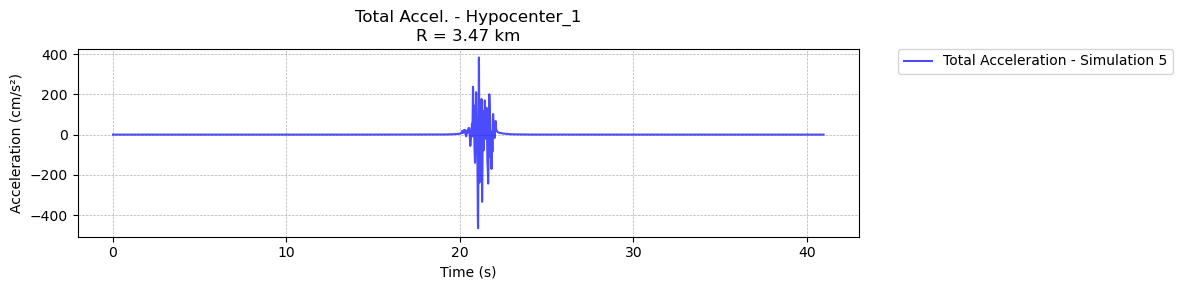

Processing Site 19/49 (Lat: 38.82, Lon: -9.44)
Site 19: Rhypo = 5.60 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 632.5579 cm/s²
Subfault PGA (i=0, j=1): 400.4605 cm/s²
Subfault PGA (i=1, j=0): 412.2440 cm/s²
Subfault PGA (i=1, j=1): 88.6139 cm/s²
Subfault PGA (i=2, j=0): 93.7888 cm/s²
Subfault PGA (i=2, j=1): 22.2367 cm/s²
Subfault PGA (i=3, j=0): 283.0086 cm/s²
Subfault PGA (i=3, j=1): 212.8457 cm/s²
Total PGA: 645.3050 cmm/s²
Total PGA: 645.3050 cm/s²


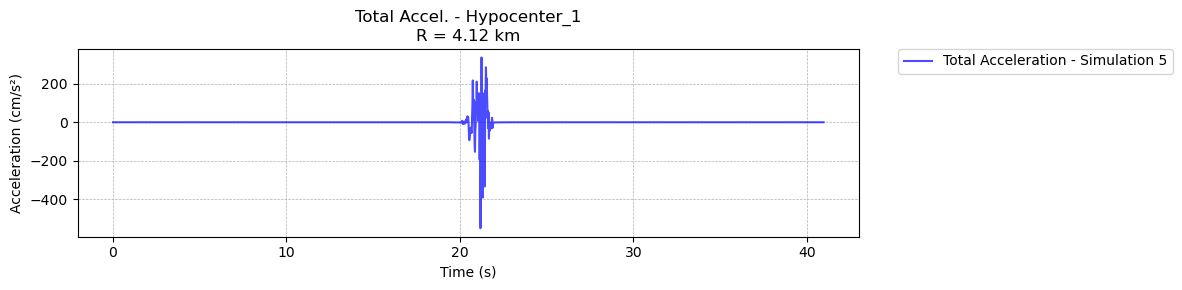

Processing Site 20/49 (Lat: 38.84, Lon: -9.44)
Site 20: Rhypo = 6.58 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 522.5927 cm/s²
Subfault PGA (i=0, j=1): 253.0386 cm/s²
Subfault PGA (i=1, j=0): 349.3260 cm/s²
Subfault PGA (i=1, j=1): 75.2861 cm/s²
Subfault PGA (i=2, j=0): 109.0559 cm/s²
Subfault PGA (i=2, j=1): 22.8933 cm/s²
Subfault PGA (i=3, j=0): 349.0053 cm/s²
Subfault PGA (i=3, j=1): 228.2033 cm/s²
Total PGA: 572.4989 cmm/s²
Total PGA: 572.4989 cm/s²


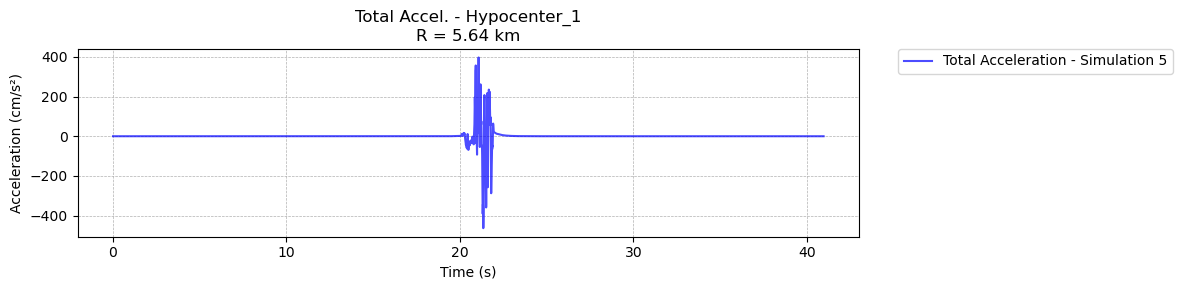

Processing Site 21/49 (Lat: 38.86, Lon: -9.44)
Site 21: Rhypo = 8.07 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 361.9112 cm/s²
Subfault PGA (i=0, j=1): 249.6906 cm/s²
Subfault PGA (i=1, j=0): 332.7276 cm/s²
Subfault PGA (i=1, j=1): 66.9648 cm/s²
Subfault PGA (i=2, j=0): 95.4857 cm/s²
Subfault PGA (i=2, j=1): 18.9167 cm/s²
Subfault PGA (i=3, j=0): 375.1217 cm/s²
Subfault PGA (i=3, j=1): 215.6621 cm/s²
Total PGA: 406.2258 cmm/s²
Total PGA: 406.2258 cm/s²


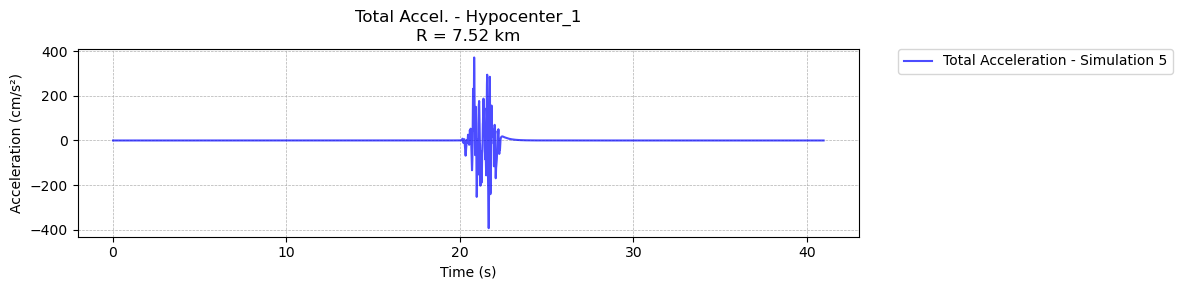

Processing Site 22/49 (Lat: 38.88, Lon: -9.44)
Site 22: Rhypo = 9.84 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 297.4743 cm/s²
Subfault PGA (i=0, j=1): 208.6467 cm/s²
Subfault PGA (i=1, j=0): 239.8282 cm/s²
Subfault PGA (i=1, j=1): 46.5227 cm/s²
Subfault PGA (i=2, j=0): 63.5766 cm/s²
Subfault PGA (i=2, j=1): 19.9185 cm/s²
Subfault PGA (i=3, j=0): 367.6260 cm/s²
Subfault PGA (i=3, j=1): 255.3302 cm/s²
Total PGA: 369.2604 cmm/s²
Total PGA: 369.2604 cm/s²


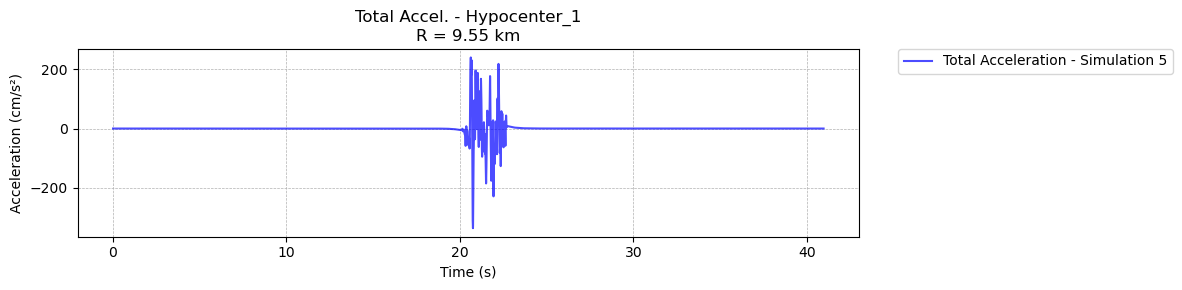

Processing Site 23/49 (Lat: 38.7, Lon: -9.42)
Site 23: Rhypo = 12.73 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 192.9562 cm/s²
Subfault PGA (i=0, j=1): 188.8479 cm/s²
Subfault PGA (i=1, j=0): 120.1006 cm/s²
Subfault PGA (i=1, j=1): 24.3671 cm/s²
Subfault PGA (i=2, j=0): 22.9268 cm/s²
Subfault PGA (i=2, j=1): 8.9639 cm/s²
Subfault PGA (i=3, j=0): 81.5968 cm/s²
Subfault PGA (i=3, j=1): 97.7163 cm/s²
Total PGA: 281.7114 cmm/s²
Total PGA: 281.7114 cm/s²


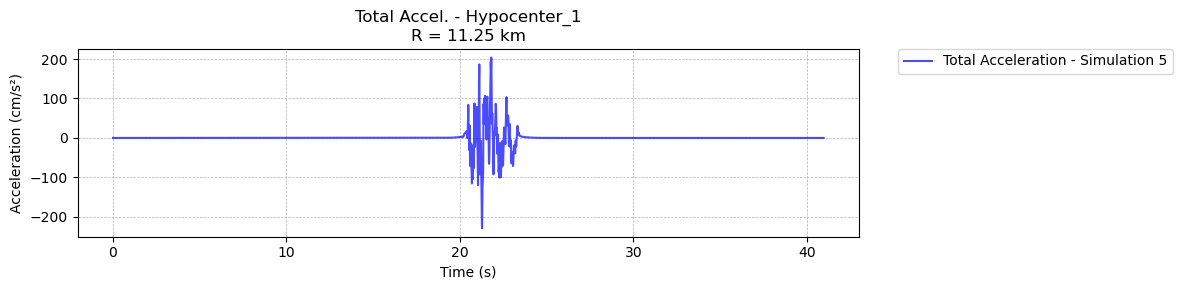

Processing Site 24/49 (Lat: 38.72, Lon: -9.42)
Site 24: Rhypo = 10.71 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 297.4441 cm/s²
Subfault PGA (i=0, j=1): 273.4543 cm/s²
Subfault PGA (i=1, j=0): 175.1266 cm/s²
Subfault PGA (i=1, j=1): 40.7986 cm/s²
Subfault PGA (i=2, j=0): 21.8685 cm/s²
Subfault PGA (i=2, j=1): 10.0980 cm/s²
Subfault PGA (i=3, j=0): 146.7654 cm/s²
Subfault PGA (i=3, j=1): 87.7385 cm/s²
Total PGA: 442.5024 cmm/s²
Total PGA: 442.5024 cm/s²


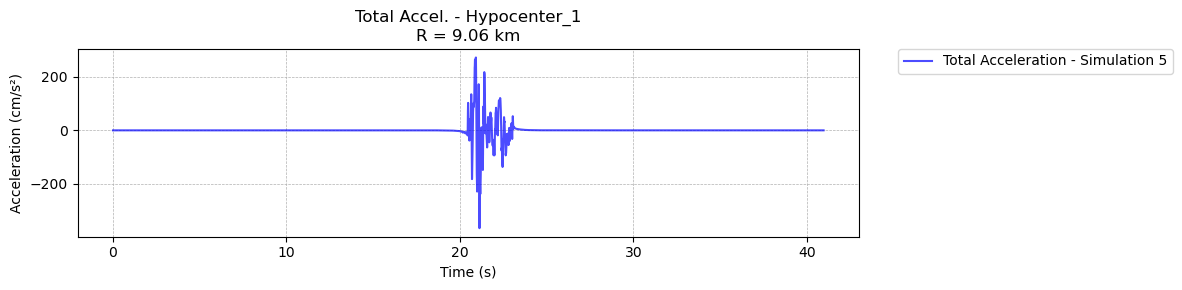

Processing Site 25/49 (Lat: 38.74, Lon: -9.42)
Site 25: Rhypo = 8.79 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 371.0040 cm/s²
Subfault PGA (i=0, j=1): 275.6616 cm/s²
Subfault PGA (i=1, j=0): 232.2812 cm/s²
Subfault PGA (i=1, j=1): 59.1065 cm/s²
Subfault PGA (i=2, j=0): 35.5356 cm/s²
Subfault PGA (i=2, j=1): 13.1037 cm/s²
Subfault PGA (i=3, j=0): 149.7328 cm/s²
Subfault PGA (i=3, j=1): 142.8231 cm/s²
Total PGA: 572.4052 cmm/s²
Total PGA: 572.4052 cm/s²


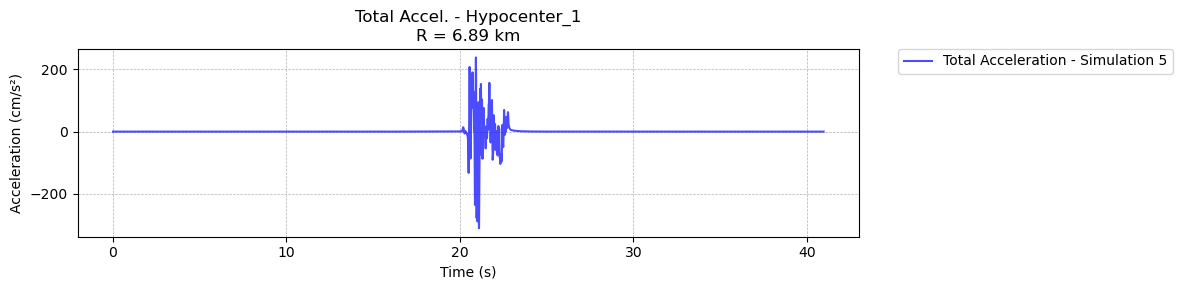

Processing Site 26/49 (Lat: 38.76, Lon: -9.42)
Site 26: Rhypo = 7.05 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 579.5824 cm/s²
Subfault PGA (i=0, j=1): 447.4377 cm/s²
Subfault PGA (i=1, j=0): 323.2827 cm/s²
Subfault PGA (i=1, j=1): 86.2049 cm/s²
Subfault PGA (i=2, j=0): 55.3628 cm/s²
Subfault PGA (i=2, j=1): 18.6653 cm/s²
Subfault PGA (i=3, j=0): 248.1137 cm/s²
Subfault PGA (i=3, j=1): 117.8797 cm/s²
Total PGA: 801.6975 cmm/s²
Total PGA: 801.6975 cm/s²


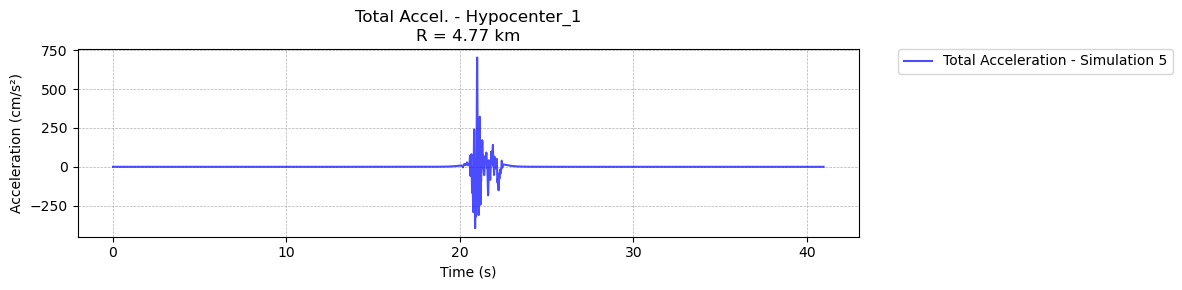

Processing Site 27/49 (Lat: 38.78, Lon: -9.42)
Site 27: Rhypo = 5.65 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 723.9933 cm/s²
Subfault PGA (i=0, j=1): 487.8112 cm/s²
Subfault PGA (i=1, j=0): 352.7996 cm/s²
Subfault PGA (i=1, j=1): 77.1054 cm/s²
Subfault PGA (i=2, j=0): 83.0141 cm/s²
Subfault PGA (i=2, j=1): 20.8619 cm/s²
Subfault PGA (i=3, j=0): 247.2910 cm/s²
Subfault PGA (i=3, j=1): 190.2883 cm/s²
Total PGA: 961.6930 cmm/s²
Total PGA: 961.6930 cm/s²


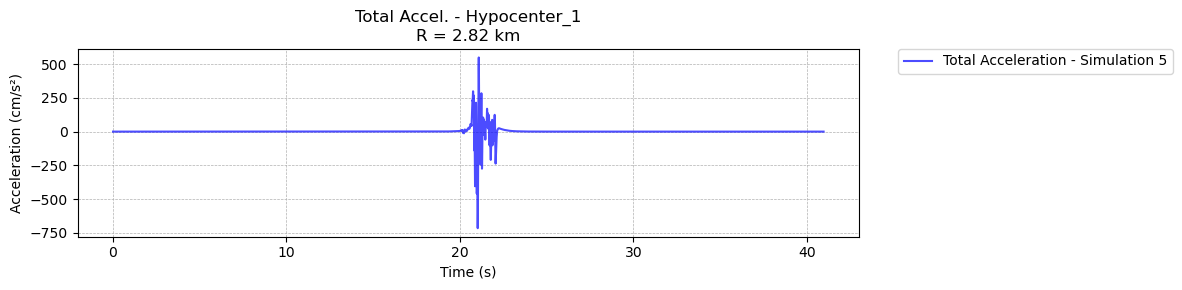

Processing Site 28/49 (Lat: 38.8, Lon: -9.42)
Site 28: Rhypo = 4.91 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 782.3529 cm/s²
Subfault PGA (i=0, j=1): 485.9654 cm/s²
Subfault PGA (i=1, j=0): 389.5843 cm/s²
Subfault PGA (i=1, j=1): 81.9709 cm/s²
Subfault PGA (i=2, j=0): 115.4243 cm/s²
Subfault PGA (i=2, j=1): 26.0163 cm/s²
Subfault PGA (i=3, j=0): 296.2199 cm/s²
Subfault PGA (i=3, j=1): 257.6786 cm/s²
Total PGA: 982.2316 cmm/s²
Total PGA: 982.2316 cm/s²


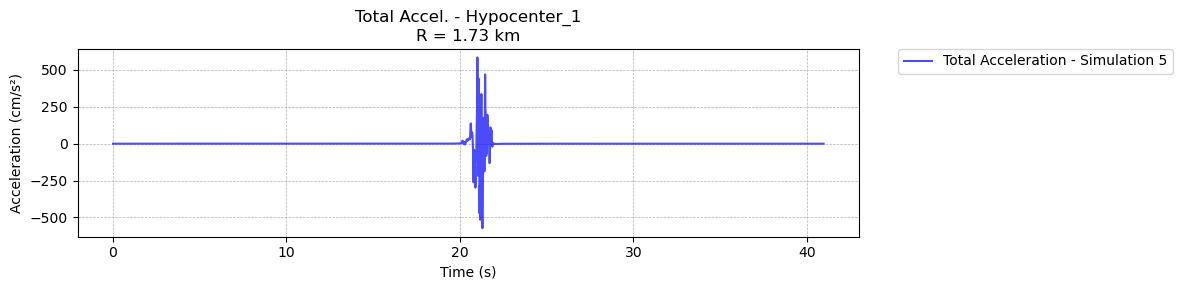

Processing Site 29/49 (Lat: 38.82, Lon: -9.42)
Site 29: Rhypo = 5.12 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 752.4007 cm/s²
Subfault PGA (i=0, j=1): 460.0694 cm/s²
Subfault PGA (i=1, j=0): 426.5777 cm/s²
Subfault PGA (i=1, j=1): 72.9916 cm/s²
Subfault PGA (i=2, j=0): 131.6872 cm/s²
Subfault PGA (i=2, j=1): 28.2588 cm/s²
Subfault PGA (i=3, j=0): 391.1297 cm/s²
Subfault PGA (i=3, j=1): 287.0771 cm/s²
Total PGA: 978.0438 cmm/s²
Total PGA: 978.0438 cm/s²


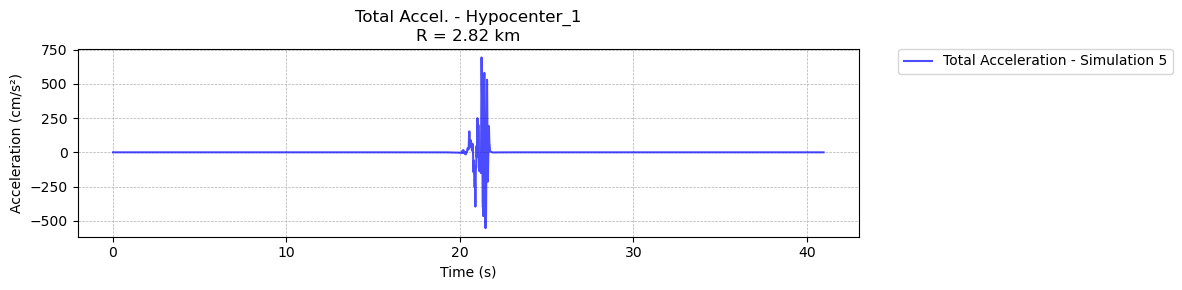

Processing Site 30/49 (Lat: 38.84, Lon: -9.42)
Site 30: Rhypo = 6.18 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 636.3408 cm/s²
Subfault PGA (i=0, j=1): 406.7899 cm/s²
Subfault PGA (i=1, j=0): 462.4734 cm/s²
Subfault PGA (i=1, j=1): 87.0470 cm/s²
Subfault PGA (i=2, j=0): 117.9585 cm/s²
Subfault PGA (i=2, j=1): 30.6250 cm/s²
Subfault PGA (i=3, j=0): 452.2926 cm/s²
Subfault PGA (i=3, j=1): 229.7838 cm/s²
Total PGA: 743.5916 cmm/s²
Total PGA: 743.5916 cm/s²


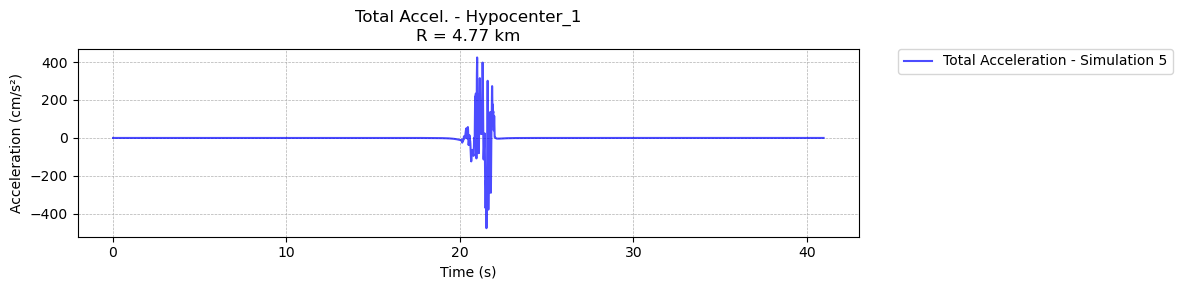

Processing Site 31/49 (Lat: 38.86, Lon: -9.42)
Site 31: Rhypo = 7.75 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 458.5290 cm/s²
Subfault PGA (i=0, j=1): 247.5888 cm/s²
Subfault PGA (i=1, j=0): 362.6253 cm/s²
Subfault PGA (i=1, j=1): 73.6026 cm/s²
Subfault PGA (i=2, j=0): 94.0794 cm/s²
Subfault PGA (i=2, j=1): 25.5877 cm/s²
Subfault PGA (i=3, j=0): 439.7096 cm/s²
Subfault PGA (i=3, j=1): 234.9599 cm/s²
Total PGA: 576.2238 cmm/s²
Total PGA: 576.2238 cm/s²


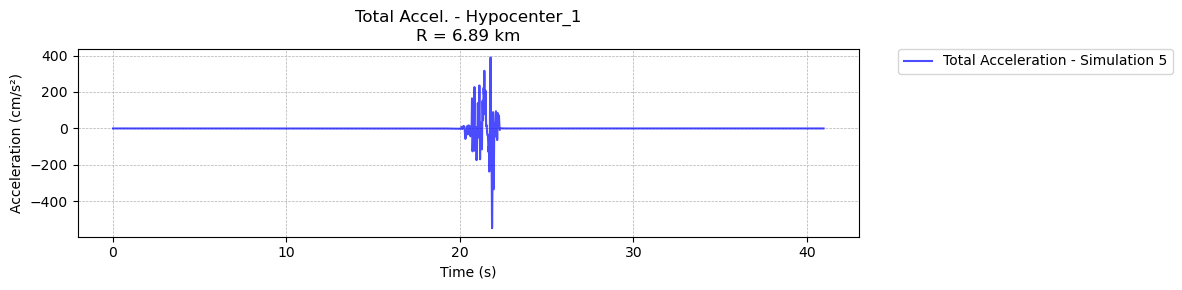

Processing Site 32/49 (Lat: 38.88, Lon: -9.42)
Site 32: Rhypo = 9.58 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 302.8763 cm/s²
Subfault PGA (i=0, j=1): 173.7461 cm/s²
Subfault PGA (i=1, j=0): 284.3867 cm/s²
Subfault PGA (i=1, j=1): 55.6232 cm/s²
Subfault PGA (i=2, j=0): 78.6832 cm/s²
Subfault PGA (i=2, j=1): 18.3593 cm/s²
Subfault PGA (i=3, j=0): 519.6873 cm/s²
Subfault PGA (i=3, j=1): 234.3702 cm/s²
Total PGA: 564.9208 cmm/s²
Total PGA: 564.9208 cm/s²


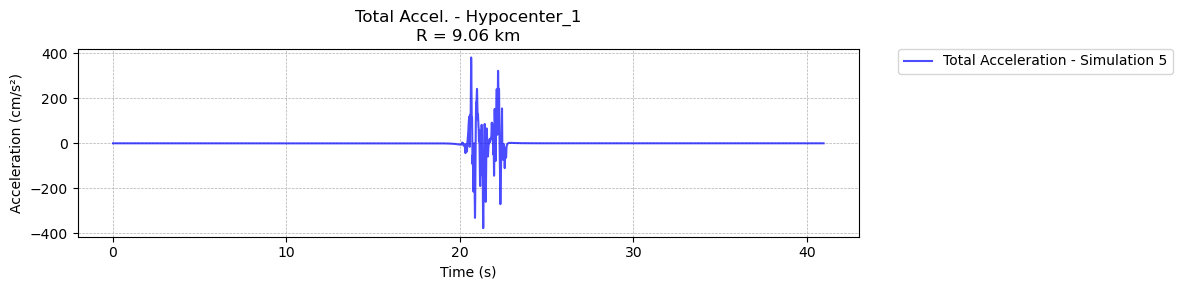

Processing Site 33/49 (Lat: 38.9, Lon: -9.42)
Site 33: Rhypo = 11.55 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 284.1171 cm/s²
Subfault PGA (i=0, j=1): 166.4582 cm/s²
Subfault PGA (i=1, j=0): 228.7733 cm/s²
Subfault PGA (i=1, j=1): 31.9736 cm/s²
Subfault PGA (i=2, j=0): 69.9413 cm/s²
Subfault PGA (i=2, j=1): 17.6108 cm/s²
Subfault PGA (i=3, j=0): 370.2630 cm/s²
Subfault PGA (i=3, j=1): 193.6222 cm/s²
Total PGA: 366.4002 cmm/s²
Total PGA: 366.4002 cm/s²


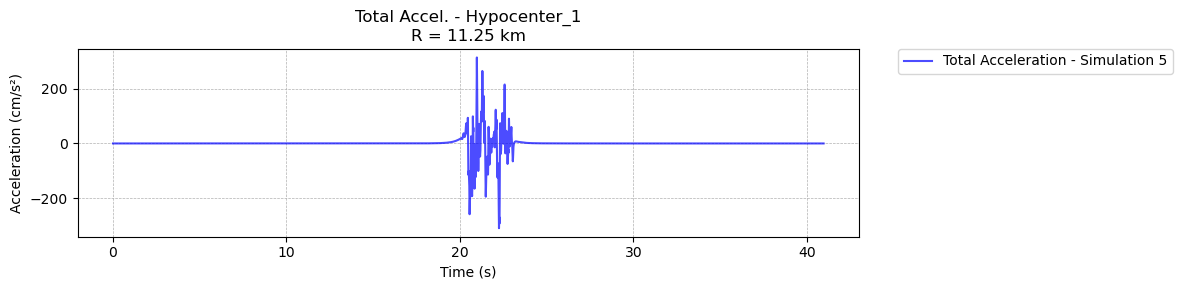

Processing Site 34/49 (Lat: 38.92, Lon: -9.42)
Site 34: Rhypo = 13.60 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 209.7525 cm/s²
Subfault PGA (i=0, j=1): 119.2684 cm/s²
Subfault PGA (i=1, j=0): 181.9914 cm/s²
Subfault PGA (i=1, j=1): 31.3492 cm/s²
Subfault PGA (i=2, j=0): 36.1946 cm/s²
Subfault PGA (i=2, j=1): 17.8340 cm/s²
Subfault PGA (i=3, j=0): 295.6389 cm/s²
Subfault PGA (i=3, j=1): 118.0999 cm/s²
Total PGA: 288.8393 cmm/s²
Total PGA: 288.8393 cm/s²


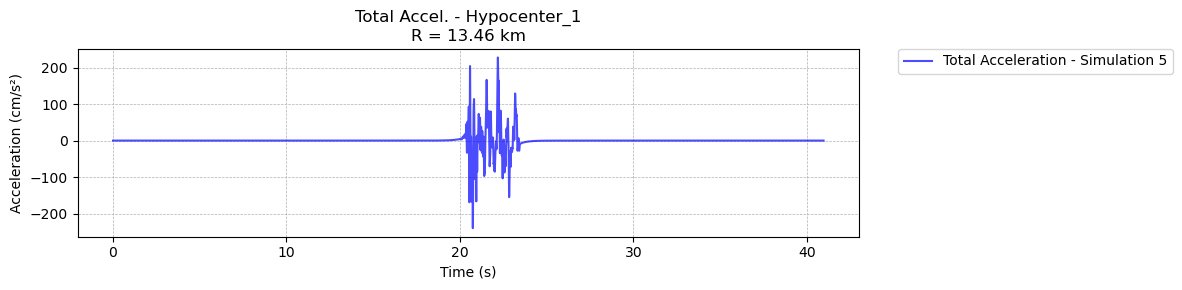

Processing Site 35/49 (Lat: 38.98, Lon: -9.42)
Site 35: Rhypo = 19.97 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 81.2251 cm/s²
Subfault PGA (i=0, j=1): 73.5186 cm/s²
Subfault PGA (i=1, j=0): 85.7698 cm/s²
Subfault PGA (i=1, j=1): 14.9872 cm/s²
Subfault PGA (i=2, j=0): 22.5894 cm/s²
Subfault PGA (i=2, j=1): 7.6377 cm/s²
Subfault PGA (i=3, j=0): 145.5696 cm/s²
Subfault PGA (i=3, j=1): 86.5121 cm/s²
Total PGA: 171.9288 cmm/s²
Total PGA: 171.9288 cm/s²


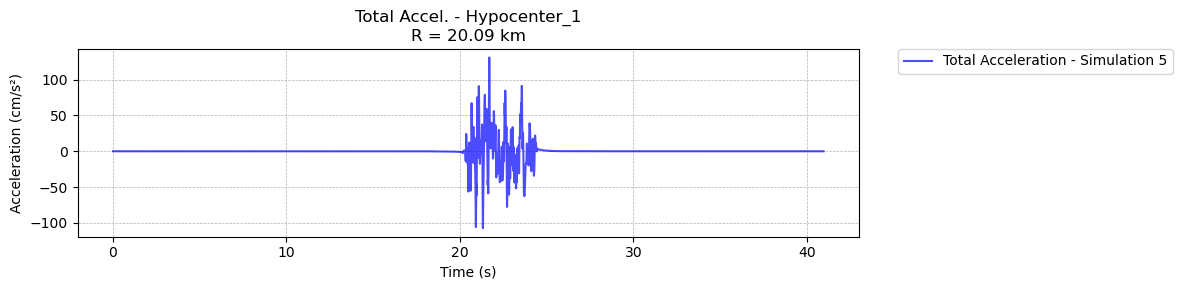

Processing Site 36/49 (Lat: 39.0, Lon: -9.42)
Site 36: Rhypo = 22.13 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 65.4148 cm/s²
Subfault PGA (i=0, j=1): 52.0304 cm/s²
Subfault PGA (i=1, j=0): 68.1908 cm/s²
Subfault PGA (i=1, j=1): 12.0094 cm/s²
Subfault PGA (i=2, j=0): 16.5393 cm/s²
Subfault PGA (i=2, j=1): 5.3928 cm/s²
Subfault PGA (i=3, j=0): 111.4819 cm/s²
Subfault PGA (i=3, j=1): 59.2280 cm/s²
Total PGA: 124.8788 cmm/s²
Total PGA: 124.8788 cm/s²


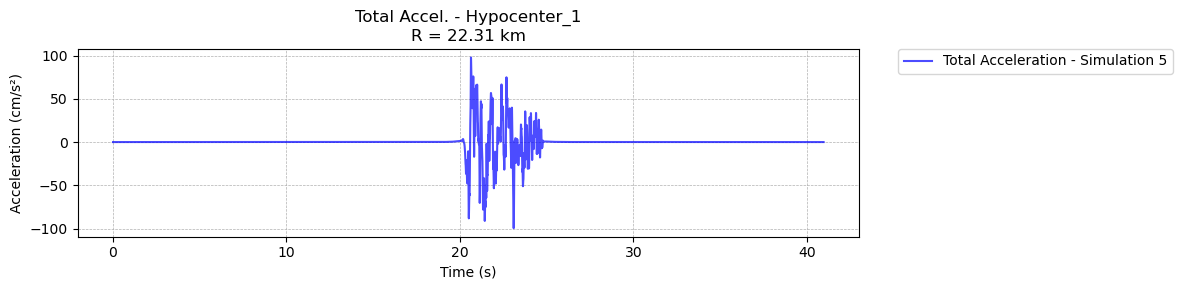

Processing Site 37/49 (Lat: 39.02, Lon: -9.42)
Site 37: Rhypo = 24.31 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 55.8470 cm/s²
Subfault PGA (i=0, j=1): 36.3950 cm/s²
Subfault PGA (i=1, j=0): 42.3040 cm/s²
Subfault PGA (i=1, j=1): 11.2247 cm/s²
Subfault PGA (i=2, j=0): 14.3169 cm/s²
Subfault PGA (i=2, j=1): 4.7772 cm/s²
Subfault PGA (i=3, j=0): 88.2673 cm/s²
Subfault PGA (i=3, j=1): 43.8290 cm/s²
Total PGA: 122.1743 cmm/s²
Total PGA: 122.1743 cm/s²


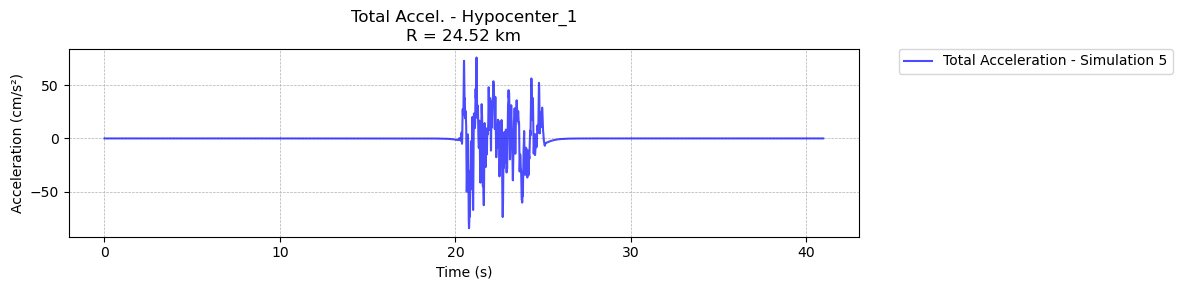

Processing Site 38/49 (Lat: 38.72, Lon: -9.4)
Site 38: Rhypo = 10.75 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 290.7547 cm/s²
Subfault PGA (i=0, j=1): 252.9810 cm/s²
Subfault PGA (i=1, j=0): 187.2318 cm/s²
Subfault PGA (i=1, j=1): 42.7082 cm/s²
Subfault PGA (i=2, j=0): 32.5144 cm/s²
Subfault PGA (i=2, j=1): 11.6559 cm/s²
Subfault PGA (i=3, j=0): 143.4011 cm/s²
Subfault PGA (i=3, j=1): 99.8148 cm/s²
Total PGA: 309.8536 cmm/s²
Total PGA: 309.8536 cm/s²


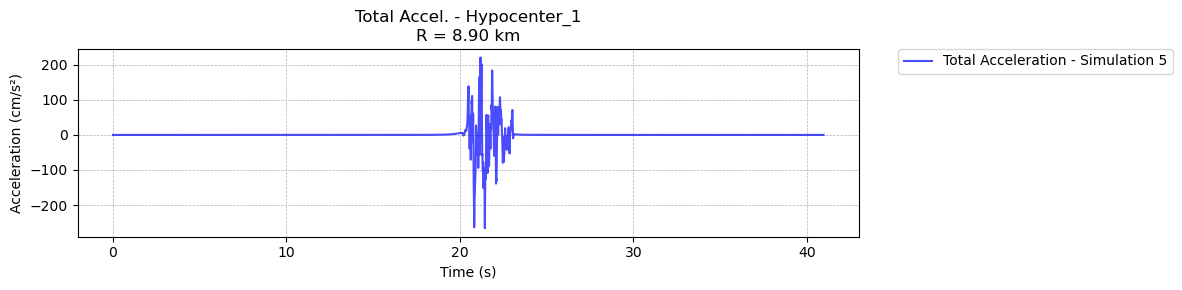

Processing Site 39/49 (Lat: 38.74, Lon: -9.4)
Site 39: Rhypo = 8.84 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 405.8088 cm/s²
Subfault PGA (i=0, j=1): 277.3646 cm/s²
Subfault PGA (i=1, j=0): 243.0063 cm/s²
Subfault PGA (i=1, j=1): 65.3675 cm/s²
Subfault PGA (i=2, j=0): 50.0043 cm/s²
Subfault PGA (i=2, j=1): 14.9645 cm/s²
Subfault PGA (i=3, j=0): 176.8594 cm/s²
Subfault PGA (i=3, j=1): 142.7253 cm/s²
Total PGA: 426.9942 cmm/s²
Total PGA: 426.9942 cm/s²


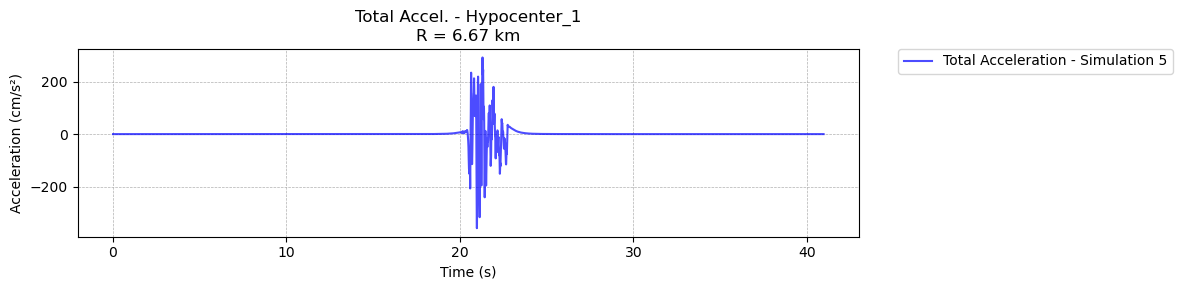

Processing Site 40/49 (Lat: 38.76, Lon: -9.4)
Site 40: Rhypo = 7.11 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 641.9660 cm/s²
Subfault PGA (i=0, j=1): 499.7091 cm/s²
Subfault PGA (i=1, j=0): 326.4735 cm/s²
Subfault PGA (i=1, j=1): 83.8679 cm/s²
Subfault PGA (i=2, j=0): 80.1680 cm/s²
Subfault PGA (i=2, j=1): 23.2395 cm/s²
Subfault PGA (i=3, j=0): 200.0190 cm/s²
Subfault PGA (i=3, j=1): 179.2569 cm/s²
Total PGA: 873.2519 cmm/s²
Total PGA: 873.2519 cm/s²


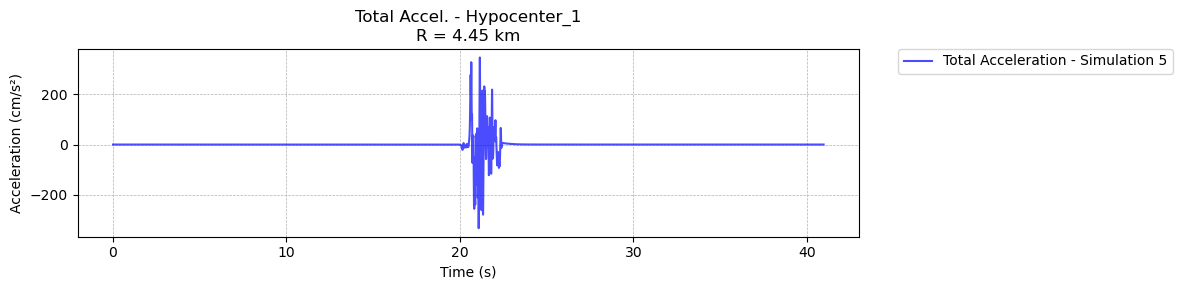

Processing Site 41/49 (Lat: 38.78, Lon: -9.4)
Site 41: Rhypo = 5.73 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 795.4269 cm/s²
Subfault PGA (i=0, j=1): 542.9811 cm/s²
Subfault PGA (i=1, j=0): 373.0470 cm/s²
Subfault PGA (i=1, j=1): 107.0566 cm/s²
Subfault PGA (i=2, j=0): 106.5569 cm/s²
Subfault PGA (i=2, j=1): 27.0035 cm/s²
Subfault PGA (i=3, j=0): 289.6985 cm/s²
Subfault PGA (i=3, j=1): 196.6291 cm/s²
Total PGA: 854.4946 cmm/s²
Total PGA: 854.4946 cm/s²


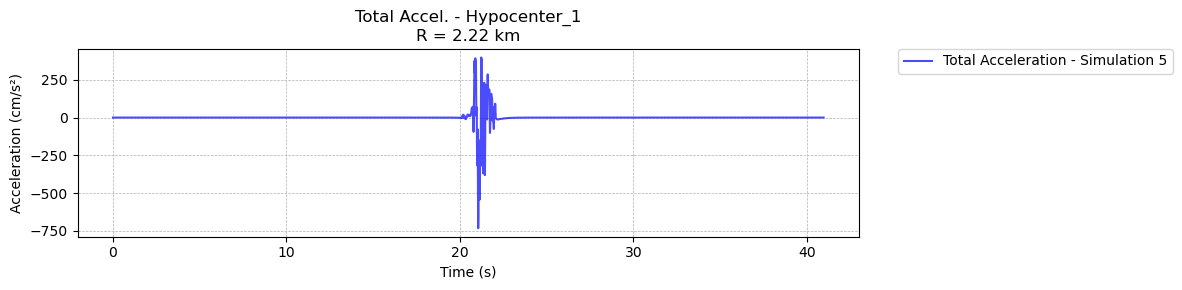

Processing Site 42/49 (Lat: 38.83, Lon: -9.43)
Site 42: Rhypo = 5.72 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 649.0885 cm/s²
Subfault PGA (i=0, j=1): 408.1193 cm/s²
Subfault PGA (i=1, j=0): 435.9209 cm/s²
Subfault PGA (i=1, j=1): 84.7117 cm/s²
Subfault PGA (i=2, j=0): 88.1051 cm/s²
Subfault PGA (i=2, j=1): 26.6122 cm/s²
Subfault PGA (i=3, j=0): 416.1857 cm/s²
Subfault PGA (i=3, j=1): 277.0810 cm/s²
Total PGA: 713.1142 cmm/s²
Total PGA: 713.1142 cm/s²


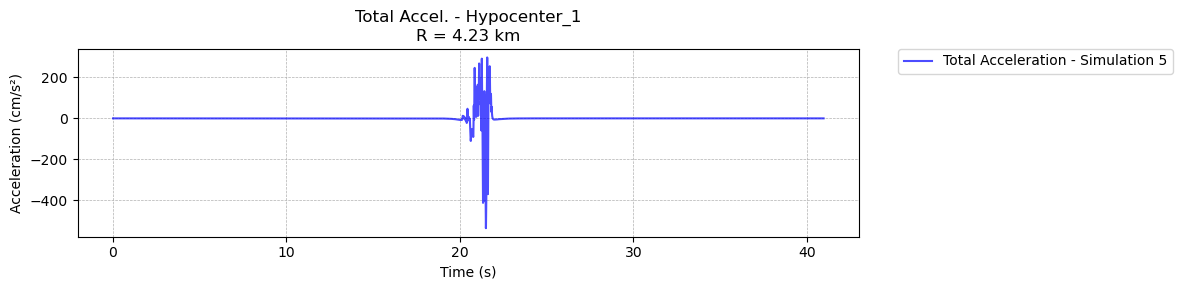

Processing Site 43/49 (Lat: 38.82, Lon: -9.4)
Site 43: Rhypo = 5.20 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 831.1155 cm/s²
Subfault PGA (i=0, j=1): 498.1590 cm/s²
Subfault PGA (i=1, j=0): 550.9147 cm/s²
Subfault PGA (i=1, j=1): 135.7038 cm/s²
Subfault PGA (i=2, j=0): 121.1974 cm/s²
Subfault PGA (i=2, j=1): 37.8732 cm/s²
Subfault PGA (i=3, j=0): 489.9985 cm/s²
Subfault PGA (i=3, j=1): 236.9529 cm/s²
Total PGA: 1107.4454 cmm/s²
Total PGA: 1107.4454 cm/s²


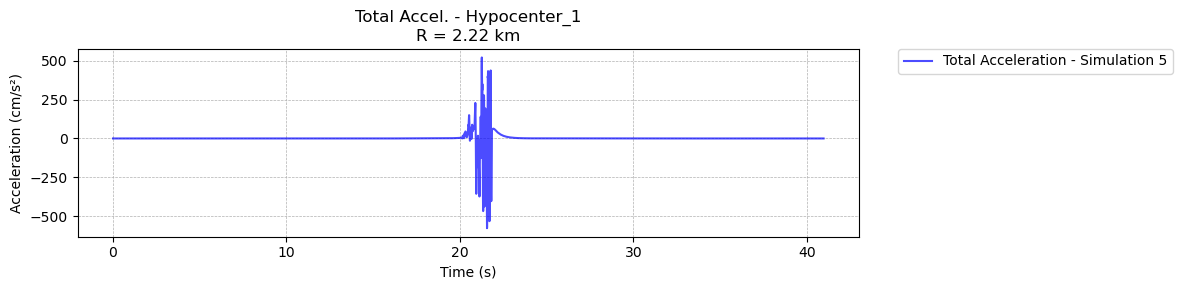

Processing Site 44/49 (Lat: 38.84, Lon: -9.4)
Site 44: Rhypo = 6.25 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 703.3074 cm/s²
Subfault PGA (i=0, j=1): 448.2452 cm/s²
Subfault PGA (i=1, j=0): 492.0129 cm/s²
Subfault PGA (i=1, j=1): 80.5211 cm/s²
Subfault PGA (i=2, j=0): 159.3942 cm/s²
Subfault PGA (i=2, j=1): 30.2230 cm/s²
Subfault PGA (i=3, j=0): 602.0614 cm/s²
Subfault PGA (i=3, j=1): 286.9211 cm/s²
Total PGA: 862.4610 cmm/s²
Total PGA: 862.4610 cm/s²


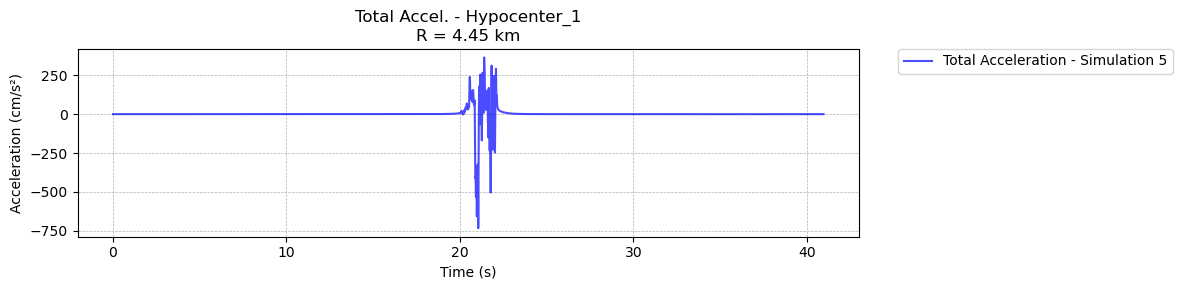

Processing Site 45/49 (Lat: 38.86, Lon: -9.4)
Site 45: Rhypo = 7.80 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 514.0062 cm/s²
Subfault PGA (i=0, j=1): 302.9917 cm/s²
Subfault PGA (i=1, j=0): 402.8707 cm/s²
Subfault PGA (i=1, j=1): 98.9016 cm/s²
Subfault PGA (i=2, j=0): 123.4715 cm/s²
Subfault PGA (i=2, j=1): 28.8036 cm/s²
Subfault PGA (i=3, j=0): 585.9200 cm/s²
Subfault PGA (i=3, j=1): 253.0849 cm/s²
Total PGA: 628.6221 cmm/s²
Total PGA: 628.6221 cm/s²


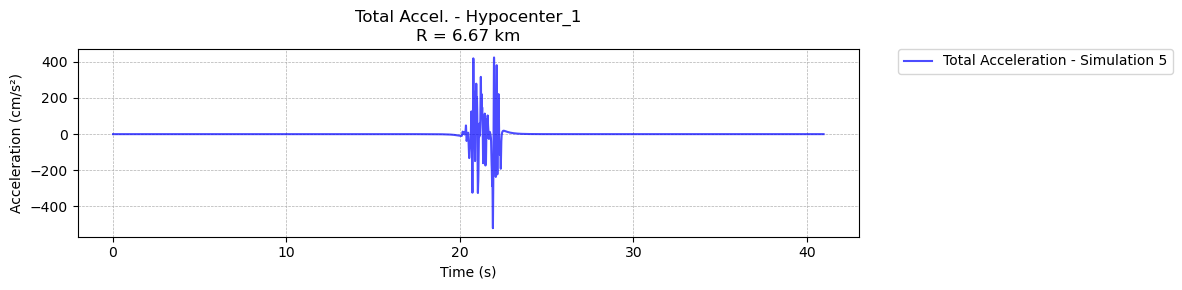

Processing Site 46/49 (Lat: 38.88, Lon: -9.4)
Site 46: Rhypo = 9.62 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 371.5666 cm/s²
Subfault PGA (i=0, j=1): 258.3321 cm/s²
Subfault PGA (i=1, j=0): 253.6366 cm/s²
Subfault PGA (i=1, j=1): 57.4831 cm/s²
Subfault PGA (i=2, j=0): 116.7812 cm/s²
Subfault PGA (i=2, j=1): 22.4384 cm/s²
Subfault PGA (i=3, j=0): 589.9365 cm/s²
Subfault PGA (i=3, j=1): 278.0660 cm/s²
Total PGA: 581.4936 cmm/s²
Total PGA: 581.4936 cm/s²


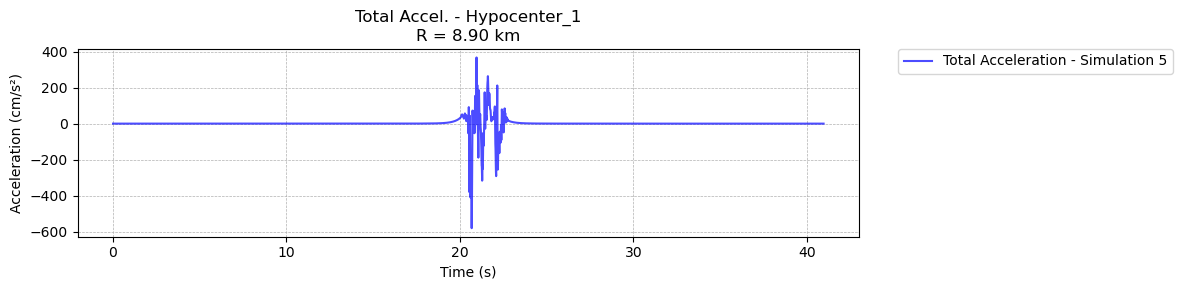

Processing Site 47/49 (Lat: 38.9, Lon: -9.4)
Site 47: Rhypo = 11.59 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 249.1694 cm/s²
Subfault PGA (i=0, j=1): 159.4519 cm/s²
Subfault PGA (i=1, j=0): 218.2319 cm/s²
Subfault PGA (i=1, j=1): 53.8372 cm/s²
Subfault PGA (i=2, j=0): 61.8826 cm/s²
Subfault PGA (i=2, j=1): 19.6956 cm/s²
Subfault PGA (i=3, j=0): 511.0521 cm/s²
Subfault PGA (i=3, j=1): 319.5450 cm/s²
Total PGA: 497.8397 cmm/s²
Total PGA: 497.8397 cm/s²


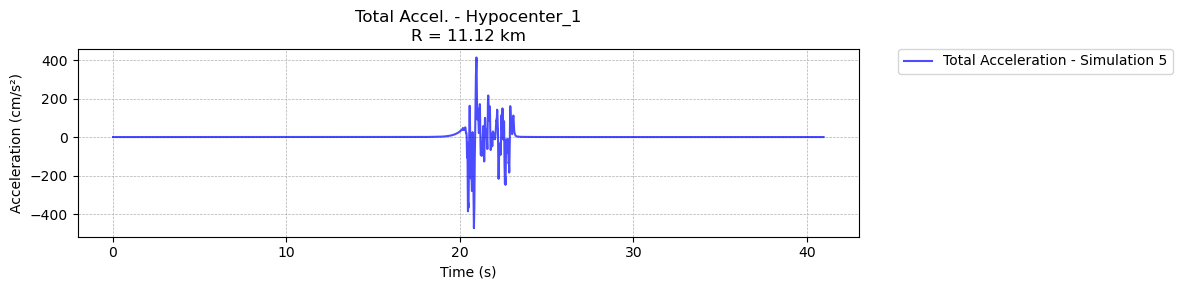

Processing Site 48/49 (Lat: 38.92, Lon: -9.4)
Site 48: Rhypo = 13.63 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 201.1700 cm/s²
Subfault PGA (i=0, j=1): 136.9160 cm/s²
Subfault PGA (i=1, j=0): 173.1523 cm/s²
Subfault PGA (i=1, j=1): 36.7909 cm/s²
Subfault PGA (i=2, j=0): 54.4677 cm/s²
Subfault PGA (i=2, j=1): 14.4617 cm/s²
Subfault PGA (i=3, j=0): 398.5380 cm/s²
Subfault PGA (i=3, j=1): 184.4026 cm/s²
Total PGA: 394.3063 cmm/s²
Total PGA: 394.3063 cm/s²


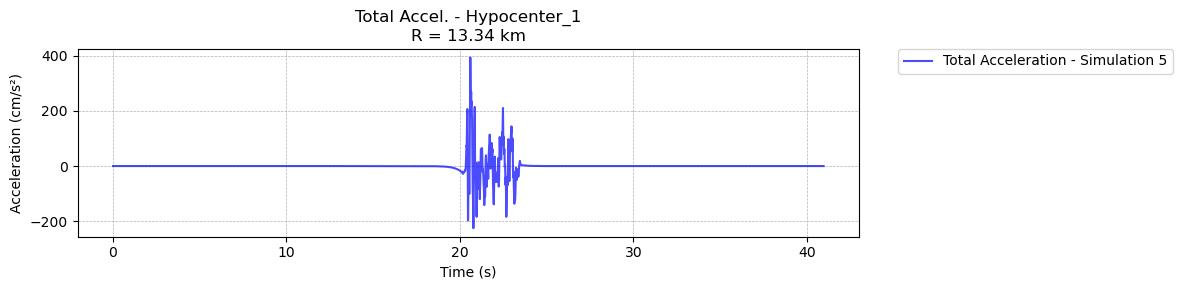

Processing Site 49/49 (Lat: 38.94, Lon: -9.4)
Site 49: Rhypo = 15.72 km
Processing Hypocenter 1 at i0=2, j0=1
Number of active subfaults: 8
Fault dimensions: 8.091381560990689×4.989105428661019 km
Subfault grid: 4×2
no_effective_subfaults: 1
Subfault PGA (i=0, j=0): 139.1366 cm/s²
Subfault PGA (i=0, j=1): 101.0207 cm/s²
Subfault PGA (i=1, j=0): 104.7297 cm/s²
Subfault PGA (i=1, j=1): 22.4535 cm/s²
Subfault PGA (i=2, j=0): 44.9719 cm/s²
Subfault PGA (i=2, j=1): 11.0131 cm/s²
Subfault PGA (i=3, j=0): 205.6643 cm/s²
Subfault PGA (i=3, j=1): 127.0028 cm/s²
Total PGA: 257.8672 cmm/s²
Total PGA: 257.8672 cm/s²


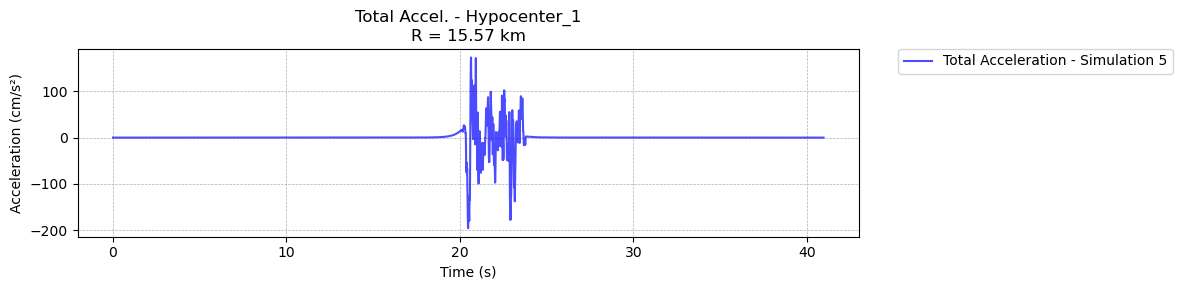

In [ ]:
# Preallocate arrays for results
num_sites = len(sites)
R = np.zeros(num_sites)
PGA_finite_fault = np.zeros(num_sites)
R_rup = np.zeros(num_sites)  
R_jb = np.zeros(num_sites)  

# Loop over each site
for site_idx, site in sites.iterrows():
    site_lat, site_lon = site['lat'], site['lon']
    print(f'Processing Site {site_idx + 1}/{num_sites} (Lat: {site_lat}, Lon: {site_lon})')

    # Compute epicentral distance and azimuth
    _, _, R_epicentral, Az = seismic_wave_generator.compute_site_location(1, site_lat, site_lon, fault_params.rupture_lat, fault_params.rupture_lon)
    
    # Compute Rhypo (hypocentral distance)
    Rhypo = seismic_wave_generator.compute_point_source_distance(R_epicentral, earthquake_params.h_ref, earthquake_params.dip, earthquake_params.strike, Az)
    R[site_idx] = Rhypo
    print(f'Site {site_idx + 1}: Rhypo = {Rhypo:.2f} km')

    # Calculate fault dimensions
    fault_width, fault_length = seismic_wave_generator.width_length(earthquake_params.M, earthquake_params.rake, earthquake_params.sigma, earthquake_params.stress_ref)
    
    # Calculate Rrup and Rjb distances
    R_rup[site_idx], R_jb[site_idx] = seismic_wave_generator.calculate_fault_distances(
        site_lat, site_lon, 
        fault_params.rupture_lat, fault_params.rupture_lon,
        earthquake_params.strike, earthquake_params.dip, 
        earthquake_params.h_ref,
        fault_width, fault_length)

    # Create a SiteParameters instance for each site
    site_params = seismic_wave_generator.SiteParameters(
        site_lat=site_lat,
        site_lon=site_lon
    )

    # Run finite-fault simulation
    Nhyp = 1  # Number of hypocenters
    PGA_ff, _, t1, all_At_dict, all_PGA_array, _  = seismic_wave_generator.finite_fault_sim(
        Nhyp,
        earthquake_params,
        simulation_params,
        site_params,
        fault_params,
        plot_results=True,  # Plot time series
        output_dir=output_folder,
        site_idx=site_idx,
        calc_rsa=False  # Disable RSA calculation for simplicity
    )

    PGA_finite_fault[site_idx] = PGA_ff
    


# Understanding the Results
The simulation produces several key outputs:

Time Series: Ground acceleration time histories for each site and simulation
PGA Values: Peak Ground Acceleration for each site
Visualization: Plots showing the simulated ground motions
Output Files: Acceleration time series saved to text files

# How the Simulation Works
The finite fault simulation follows these steps:

Fault Discretization: The fault is divided into subfaults based on the specified size
Moment Distribution: The total seismic moment is distributed among subfaults
Rupture Propagation: Time delays are calculated based on rupture velocity
Ground Motion Synthesis: Each subfault's contribution is calculated, shifted in time, and summed
Post-Processing: The combined ground motion is baseline-corrected and processed

The key advantage of this approach is its ability to capture realistic source effects, including:

Directivity effects
Complex rupture propagation
Variable slip distribution
Frequency-dependent radiation patterns

# Conclusion
This tutorial demonstrates how to set up and run stochastic finite fault simulations for earthquake ground motion prediction. The approach provides physically realistic ground motions that can be used for seismic hazard assessment, structural analysis, and other engineering applications.

# References

1. Boore, D. M. (2003). Simulation of ground motion using the stochastic method, Pure Appl. Geophys. 160, 635–676, doi: 10.1007/PL00012553.

2. Motazedian, D., & Atkinson, G. M. (2005). Stochastic finite-fault modeling based on a dynamic corner frequency. *Bulletin of the Seismological Society of America*, 95(3), 995-1010.

3. EXSIM12: A stochastic finite-fault computer program in FORTRAN, K Assatourians, G Atkinson
5. Tang, Y. (2022b). GMSS2.0: An Enhanced Software Program for Stochastic Finite-fault Ground Motion Simulation. *Seismological Research Letters*, 93: 1868–1879. https://doi.org/10.1785/0220210228

6. Tang, Y., N.T.K., Lam & H.H. Tsang (2021). A Computational Tool for Ground Motion Simulations Incorporating Regional Crustal Conditions. *Seismological Research Letters*, 92(2A): 1129-1140. https://doi.org/10.1785/0220200222

7. Atkinson, G. M., & Boore, D. M. (2006). Earthquake ground-motion prediction equations for eastern North America. *Bulletin of the Seismological Society of America*, 96(6), 2181-2205.

8. Beresnev, I. A., & Atkinson, G. M. (1997). Modeling finite-fault radiation from the ωⁿ spectrum. *Bulletin of the Seismological Society of America*, 87(1), 67-84.

9. Hartzell, S. H. (1978). Earthquake aftershocks as Green's functions. *Geophysical Research Letters*, 5(1), 1-4.

10. Irikura, K., & Kamae, K. (1994). Estimation of strong ground motion in broad-frequency band based on a seismic source scaling model and an empirical Green's function technique. *Annali di Geofisica*, 37(6), 1721-1743.